In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
dataset = pd.read_csv('movie_metadata.csv')
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [38]:
dataset.drop(['color','director_name','actor_2_name','genres','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link','language','country','content_rating','title_year'], axis = 1, inplace=True)

In [39]:
dataset.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,12.0,7.1,NaN,0


In [40]:
dataset.shape

(5043, 15)

In [41]:
dataset.drop_duplicates(inplace = True)

In [42]:
dataset.shape

(4998, 15)

In [43]:
dataset.isna().sum()

num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        874
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
budget                       487
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [44]:
dataset.dropna(inplace = True)

In [45]:
dataset.shape

(3768, 15)

In [46]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3.768000e+03,3.768000e+03,3768.000000,3768.000000,3768.000000,3.768000e+03,3768.000000,3768.000000,3768.000000,3768.000000
mean,165.501592,110.212845,801.020170,757.559713,7664.415074,5.186954e+07,1.043979e+05,11382.115711,1.377919,332.608811,4.584513e+07,1991.399682,6.466428,2.109827,9207.719745
std,123.456014,22.720245,3059.285833,1859.023336,15485.806086,6.960793e+07,1.510340e+05,19036.099715,2.056531,409.883026,2.256433e+08,4510.598255,1.055085,0.353150,21322.328408
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,0.000000,1.600000,1.180000,0.000000
25%,75.000000,96.000000,10.750000,186.000000,732.500000,7.571550e+06,1.876875e+04,1862.000000,0.000000,107.000000,1.000000e+07,372.000000,5.900000,1.850000,0.000000
50%,137.000000,106.000000,61.000000,433.000000,1000.000000,2.903650e+07,5.304050e+04,3965.000000,1.000000,207.000000,2.500000e+07,678.000000,6.600000,2.350000,217.000000
75%,223.000000,120.000000,234.000000,688.250000,12250.000000,6.646686e+07,1.269092e+05,16122.000000,2.000000,395.250000,5.000000e+07,973.500000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,137000.000000,9.300000,16.000000,349000.000000


In [47]:
dataset.drop('facenumber_in_poster', axis = 1, inplace = True)

In [48]:
dataset.shape

(3768, 14)

In [49]:
dataset = dataset.loc[(dataset!=0.0).all(axis=1)]

In [50]:
dataset.shape

(1625, 14)

In [51]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1.625000e+03,1.625000e+03,1625.000000,1625.000000,1.625000e+03,1625.000000,1625.000000,1625.000000,1625.000000
mean,178.109538,109.054769,1104.197538,886.702154,7673.352615,5.076069e+07,1.092310e+05,11746.690462,296.949538,5.079852e+07,2177.441231,6.397846,2.112240,15820.124308
std,141.157322,22.132468,3630.638092,2159.985960,12045.741292,7.230585e+07,1.669336e+05,16430.262379,360.572236,3.168686e+08,4271.165384,1.114681,0.270766,25004.078110
min,1.000000,69.000000,2.000000,2.000000,7.000000,7.030000e+02,2.200000e+01,21.000000,1.000000,1.100000e+03,3.000000,1.600000,1.330000,12.000000
25%,66.000000,96.000000,31.000000,197.000000,730.000000,5.773519e+06,1.216400e+04,1953.000000,92.000000,1.000000e+07,387.000000,5.700000,1.850000,638.000000
50%,140.000000,105.000000,101.000000,439.000000,1000.000000,2.462992e+07,4.558000e+04,3983.000000,181.000000,2.500000e+07,691.000000,6.500000,2.350000,8000.000000
75%,262.000000,118.000000,338.000000,706.000000,13000.000000,6.391058e+07,1.366730e+05,16881.000000,360.000000,5.000000e+07,991.000000,7.200000,2.350000,21000.000000
max,813.000000,330.000000,23000.000000,23000.000000,260000.000000,6.521773e+08,1.676169e+06,263584.000000,4667.000000,1.221550e+10,29000.000000,9.000000,2.760000,349000.000000


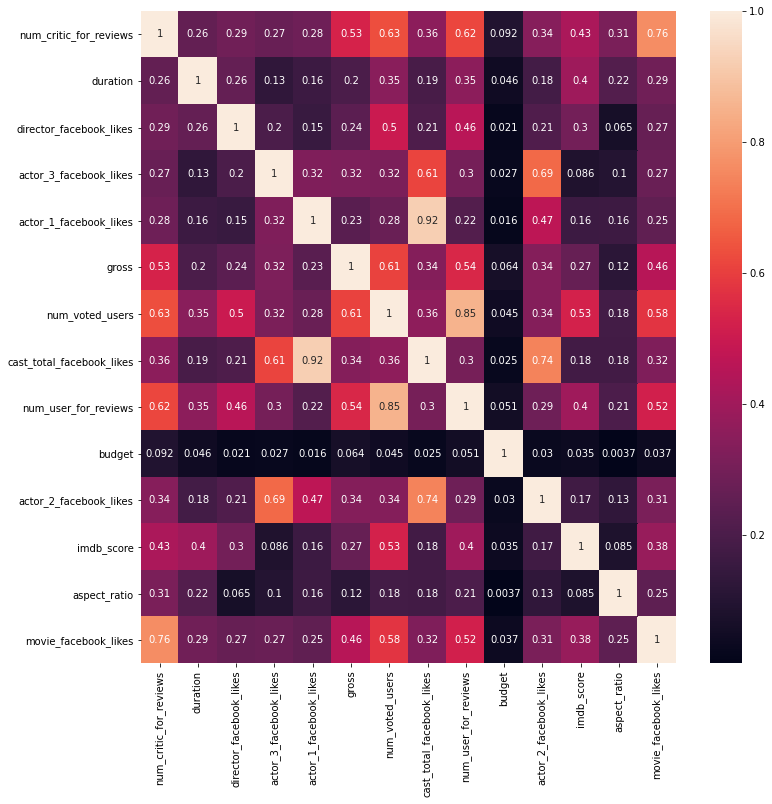

In [70]:
corr_matrix = dataset.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [53]:
X = dataset.drop(columns=['imdb_score'])

In [54]:
X

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,2.35,24000
7,324.0,100.0,15.0,284.0,799.0,200807262.0,294810,2036,387.0,260000000.0,553.0,1.85,29000
9,375.0,153.0,282.0,10000.0,25000.0,301956980.0,321795,58753,973.0,250000000.0,11000.0,2.35,10000
13,313.0,151.0,563.0,1000.0,40000.0,423032628.0,522040,48486,1832.0,225000000.0,5000.0,2.35,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,22.0,88.0,38.0,211.0,331.0,76382.0,1194,1546,8.0,15000.0,212.0,2.35,324
5026,81.0,110.0,107.0,45.0,576.0,136007.0,3924,776,39.0,4500.0,133.0,2.35,171
5029,78.0,111.0,62.0,6.0,89.0,94596.0,6318,115,50.0,1000000.0,13.0,1.85,817
5033,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,371.0,7000.0,45.0,1.85,19000


In [55]:
y = dataset['imdb_score']

In [56]:
y

3       8.5
5       6.6
7       7.8
9       7.5
13      7.3
       ... 
5023    6.2
5026    6.9
5029    7.4
5033    7.0
5042    6.6
Name: imdb_score, Length: 1625, dtype: float64

In [57]:
X = np.array(X)
y = np.array(y)

In [58]:
y = y.reshape(-1,1)
y.shape

(1625, 1)

In [59]:
X.shape

(1625, 13)

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [61]:
scaler_y = StandardScaler()
y = scaler_x.fit_transform(y)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [63]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators = 100, max_depth = 10)
RandomForest_model.fit(X_train, y_train)

/Users/n_rishabh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=10)

In [64]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.6188362683686428

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [66]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [67]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.3739589960951544

In [71]:
accuracy_RandomForest

0.6188362683686428

In [72]:
y_pred=RandomForest_model.predict(X_test)
y_pred

array([-1.07033672, -0.44374124, -0.65370575,  0.11074173,  0.05142779,
        0.75269659, -0.08902651, -0.32371017,  0.40267616,  0.22621888,
        0.1527362 , -0.15346836, -0.96133192, -0.41097035, -0.63640959,
        0.98528564, -0.50431964, -0.51937189,  0.42963521,  0.18546435,
        1.14421978,  0.16739667,  0.04263452, -0.30138477,  0.81709937,
        0.30272786,  0.03519982,  0.19816585,  0.22613987,  0.47742691,
       -1.18014788,  1.75445266,  0.96938685, -0.4943328 , -0.30538257,
       -0.01081647, -0.20619578, -0.49678904,  0.00666572,  1.71537093,
       -0.97960622,  1.45301894, -0.4165933 , -0.21718792,  0.77298601,
        0.49176088, -0.09635309, -0.31769751,  0.42273013,  0.14320253,
        0.65052269,  1.0172621 ,  0.6180631 , -1.13065465,  0.566575  ,
       -1.22248526, -0.0301081 ,  1.03890251, -0.44125889, -0.260182  ,
        0.09811521, -0.10339102, -2.30806235, -0.91169452,  1.36175265,
       -0.66927415,  1.55842995, -1.66153937, -0.20262584, -0.49

In [73]:
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 1.212692449234023


In [74]:
mse

1.4706229764292131

In [75]:
rss

155334.55188533565